# Example Tree Predictions from Weinstein et al. 2019

## Installation guidelines

This prediction example requires:
* The retinanet repo (https://github.com/bw4sz/keras-retinanet)
* OpenCV
* Keras + Tensorflow
* Numpy
* Matplotlib

In [1]:
import utilities
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/ben/miniconda3/envs/DeepLidar_dask/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Read config file

A config file holds the majority of the user defined settings including batch size, image resizing and training information

In [2]:
config = utilities.read_config()
config["batch_size"]

20

## Load a trained model

Keras models are saved in .h5 format. To access a sample model, download from the README.md

In [3]:
model = utilities.read_model("TEAK.h5", config)

Build non-max suppression with a threshold 0.10
Computing non-max suppression with a threshold 0.10


In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
padding_conv1 (ZeroPadding2D)   (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        padding_conv1[0][0]              
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu

## Predict a single image

In [5]:
# read in image, note that this is BGR format following opencv2 not RGB like in matplotlib
sample_image = cv2.imread("sample_image.tif")

In [6]:
prediction = utilities.predict_image(model,sample_image)

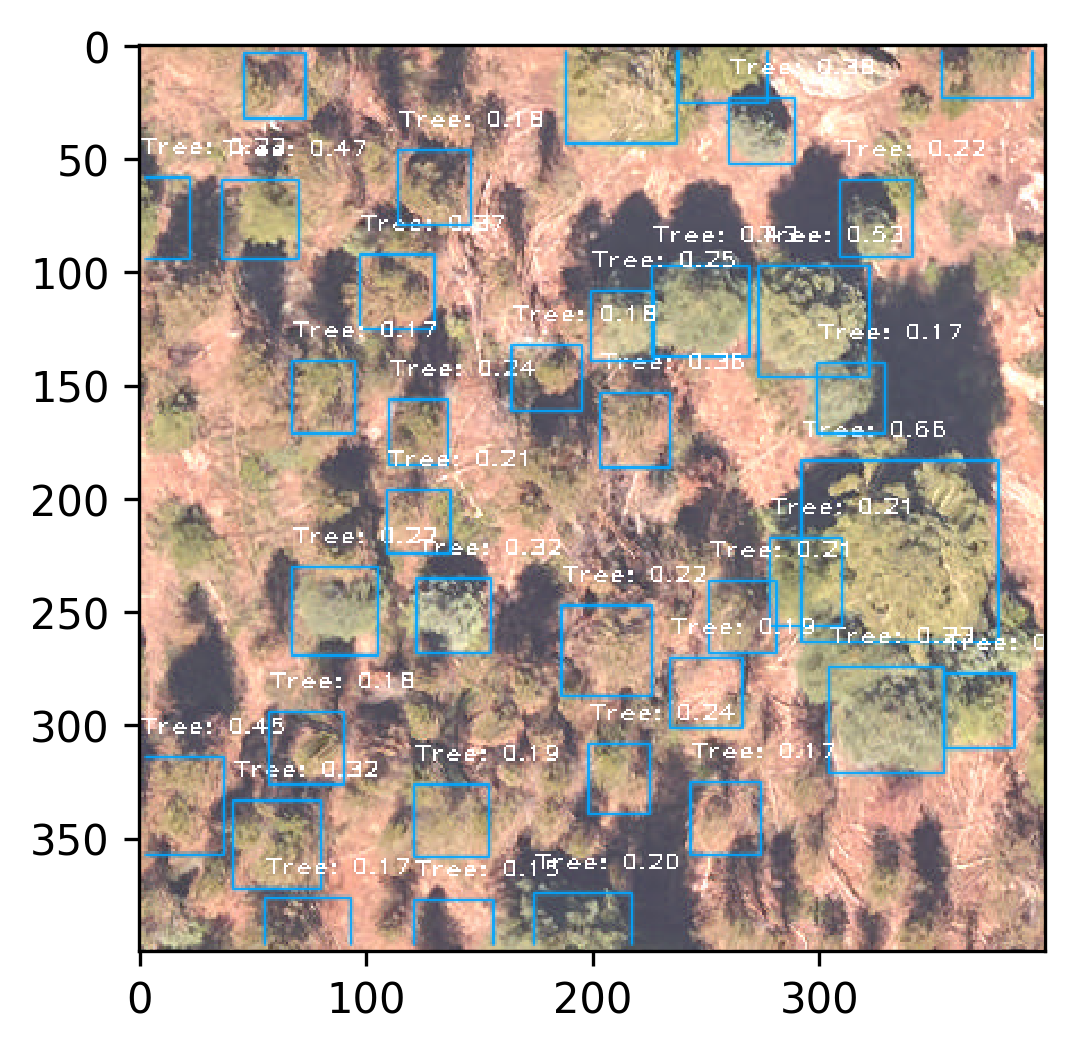

In [7]:
#BGR to RGB channel order
plt.rcParams['figure.dpi'] = 300
plt.imshow(prediction[:,:,::-1])